In [1]:
%matplotlib notebook

# TensorWatch Visualizer for CIFAR-10/100
Jupyter notebook for model visualization and metric calculations.
This notebook is meant to be run in tandem with [cifar.py](./cifar.py).

In [2]:
import tensorwatch as tw

In [3]:
client = tw.WatcherClient(filename="tw.log")

# Initialize the streams
loss_stream = client.open_stream(name="train_loss")
acc_stream = client.open_stream(name="train_acc")
test_loss_stream = client.create_stream(name="test_loss")
test_acc_stream = client.create_stream(name="test_acc")
lr_stream = client.create_stream(name="lr")

<IPython.core.display.Javascript object>


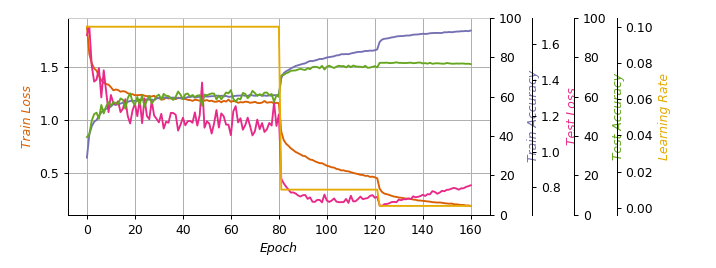

In [4]:
# show neural network training progress
loss_plot = tw.Visualizer(
    loss_stream, vis_type="line", xtitle="Epoch", ytitle="Train Loss")
loss_plot.show()

acc_plot = tw.Visualizer(
    acc_stream, host=loss_plot, vis_type="line", xtitle="Epoch",
    ytitle="Train Accuracy", yrange=(0,100))
acc_plot.show()

test_loss_plot = tw.Visualizer(
    test_loss_stream, host=loss_plot, vis_type="line", xtitle="Epoch",
    ytitle="Test Loss")
test_loss_plot.show()

test_acc_plot = tw.Visualizer(
    test_acc_stream, host=loss_plot, vis_type="line", xtitle="Epoch",
    ytitle="Test Accuracy", yrange=(0, 100))
test_acc_plot.show()

lr_plot = tw.Visualizer(
    lr_stream, host=loss_plot, vis_type="line", xtitle="Epoch",
    ytitle="Learning Rate")
lr_plot.show()


## Model Architecture Details
The following blocks are for estimating model performance (Flops, memory, parameters) per neural network module.
Compare with the profiling metrics returned by Nvidia.

In [5]:
from cifar import initialize_model

model = initialize_model("alexnet", 10)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(5, 5))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Linear(in_features=256, out_features=10, bias=True)
)


In [6]:
# Optional, show model parameters and diagram
tw.model_stats(model, [1, 3, 32, 32])
# tw.draw_model(model, [1, 3, 32, 32])

,module name,input shape,output shape,params,memory(MB),MAdd,Flops,MemRead(B),MemWrite(B),duration[%],MemR+W(B)
0,features.0,3 32 32,64 8 8,23296.0,0.02,"2,973,696.0","1,490,944.0",105472.0,16384.0,81.92%,121856.0
1,features.1,64 8 8,64 8 8,0.0,0.02,"4,096.0","4,096.0",16384.0,16384.0,0.29%,32768.0
2,features.2,64 8 8,64 4 4,0.0,0.00,"3,072.0","4,096.0",16384.0,4096.0,0.56%,20480.0
3,features.3,64 4 4,192 4 4,307392.0,0.01,"9,830,400.0","4,918,272.0",1233664.0,12288.0,3.66%,1245952.0
4,features.4,192 4 4,192 4 4,0.0,0.01,"3,072.0","3,072.0",12288.0,12288.0,0.09%,24576.0
5,features.5,192 4 4,192 2 2,0.0,0.00,"2,304.0","3,072.0",12288.0,3072.0,0.23%,15360.0
6,features.6,192 2 2,384 2 2,663936.0,0.01,"5,308,416.0","2,655,744.0",2658816.0,6144.0,3.85%,2664960.0
7,features.7,384 2 2,384 2 2,0.0,0.01,"1,536.0","1,536.0",6144.0,6144.0,0.09%,12288.0
8,features.8,384 2 2,256 2 2,884992.0,0.00,"7,077,888.0","3,539,968.0",3546112.0,4096.0,4.82%,3550208.0
9,features.9,256 2 2,256 2 2,0.0,0.00,"1,024.0","1,024.0",4096.0,4096.0,0.09%,8192.0
